In [1]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import applications

# 3.2 필기체를 분류하는 DNN 구현

### MNIST 데이터 불러오고 가공하기

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
L, W, H = x_train.shape
x_train = x_train.reshape(-1, W*H)
x_test = x_test.reshape(-1, W*H)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### DNN구현에 필요한 파라미터 정의

In [6]:
Nin = 784
Nh_1 = [100, 50]
number_of_class = 10
Nout = number_of_class

### DNN 모델 구현

In [7]:
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

### 데이터 준비

In [8]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

### 학습 효과 분석

In [9]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
#     plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
#     plt.show()

### 학습 및 성능 평가

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8976 - val_loss: 0.1840 - val_accuracy: 0.9487
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1623 - accuracy: 0.9519 - val_loss: 0.1422 - val_accuracy: 0.9589
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.1157 - accuracy: 0.9658 - val_loss: 0.1187 - val_accuracy: 0.9636
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9735 - val_loss: 0.1092 - val_accuracy: 0.9694
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.1045 - val_accuracy: 0.9700
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0970 - val_accuracy: 0.9710
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9865 - val_loss: 0.0919 - val_accuracy: 0.9722
Epoch 

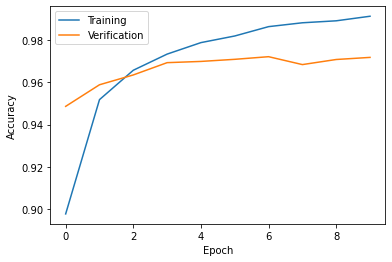

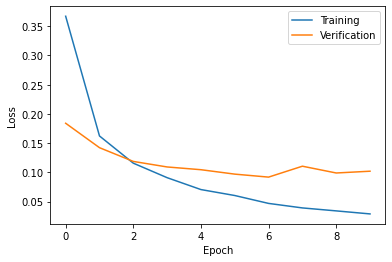

In [10]:
def main():
    Nin = 784
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(Nin, Nh_l, Nout)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    print('\n###Evaluate Model###')
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    
if __name__ == '__main__':
    main()